<a href="https://colab.research.google.com/github/jennyked/Berlin-Housing-project/blob/main/EDA_%26_Plotting_Berlin_RENTALS_projectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Task:

You want to find why some flats are more expensive than others. For this we will explore the different variables.

1. Have a look at the variables and formulate for every variable a hypothesis, how the variable affects the price of the flat.

2. Create an analysis for every hypothesis. Show your conclusion with a plot.

3. Write a short conclusion to every hypothesis test.

Some hints:

Look at correlation plots and try to find patterns that explain the price of a house

Try to use the hue variable to compare different categorical variables (e.g. condition)

**BONUS** Try to create your own variables to extract one effect and seek to explain it

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#!pip3 install --upgrade seaborn # Updates the seaborn version in the collab notebook.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv")
df.head(5)

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27


In [ ]:
#to get the data type
df.dtypes

Region                object
Condition             object
Rooms                float64
Rent                 float64
Year_Construction      int64
Space                float64
dtype: object

In [ ]:
#convert Year_construction into datetime
df['Year_Construction'] =  pd.to_datetime(df['Year_Construction'], format='%Y')

In [ ]:
df.dtypes

Region                       object
Condition                    object
Rooms                       float64
Rent                        float64
Year_Construction    datetime64[ns]
Space                       float64
dtype: object

In [ ]:
df.describe()

,Rooms,Rent,Space
count,764.000000,764.000000,764.000000
mean,2.549738,1768.560942,84.656270
std,1.010826,1118.263961,44.195338
min,1.000000,271.250000,14.000000
25%,2.000000,1039.500000,55.097500
50%,2.500000,1565.480000,77.600000
75%,3.000000,2170.000000,104.450000
max,7.000000,14207.000000,413.910000


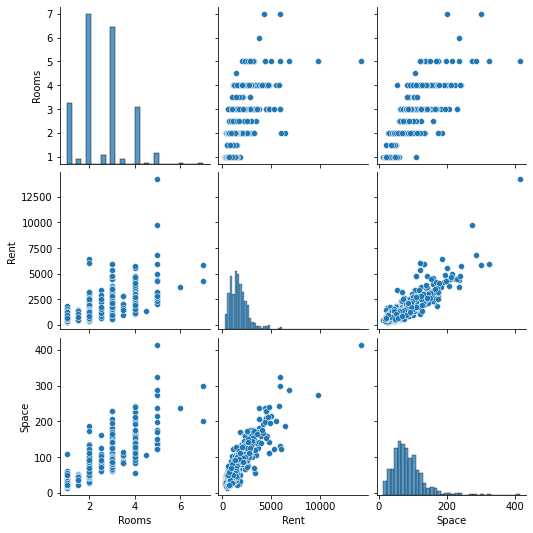

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,Rooms,Rent,Space
Rooms,1.000000,0.628816,0.793338
Rent,0.628816,1.000000,0.855683
Space,0.793338,0.855683,1.000000


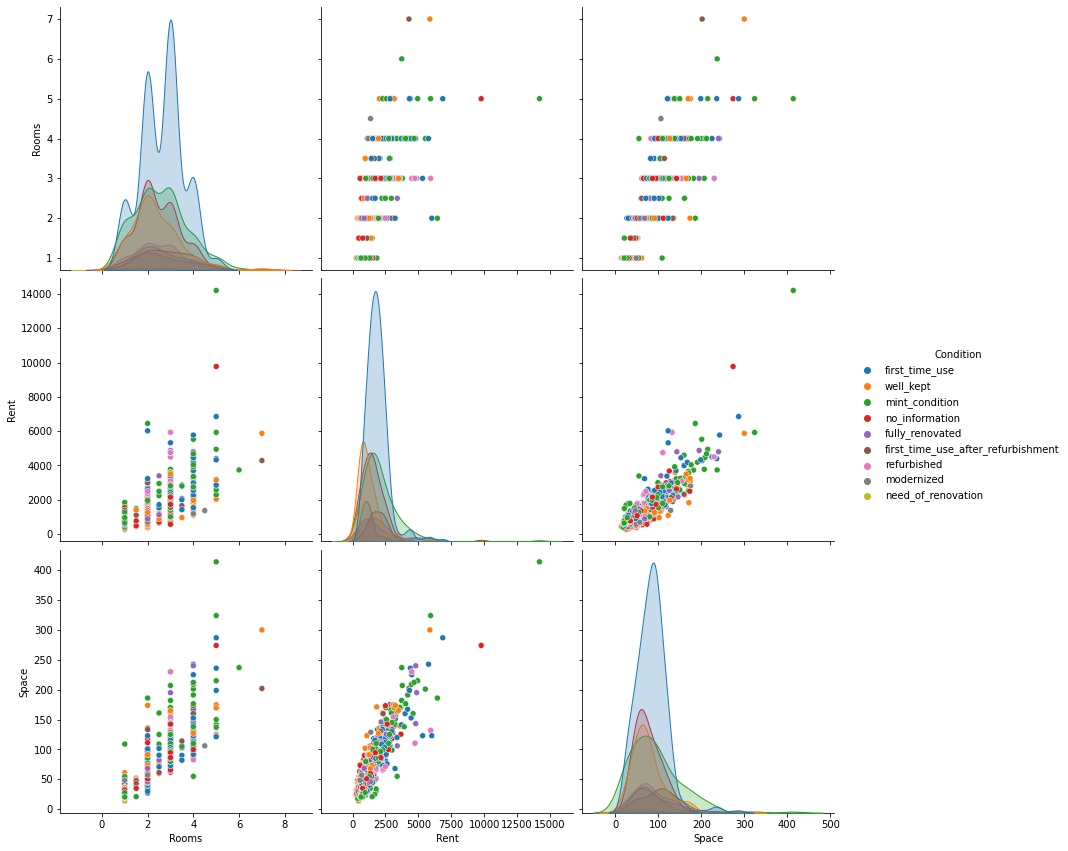

In [ ]:
sns.pairplot(df,  hue='Condition', size = 4)

Question 

1. Have a look at the variables and formulate for every variable a hypothesis, how the variable affects the price of the flat.

2. Create an analysis for every hypothesis. Show your conclusion with a plot.

3. Write a short conclusion to every hypothesis test.


In [ ]:
df.columns

Index(['Region', 'Condition', 'Rooms', 'Rent', 'Year_Construction', 'Space'], dtype='object')

# Hypothesis for Region and rent

 Is the Rent dependent on the Region?



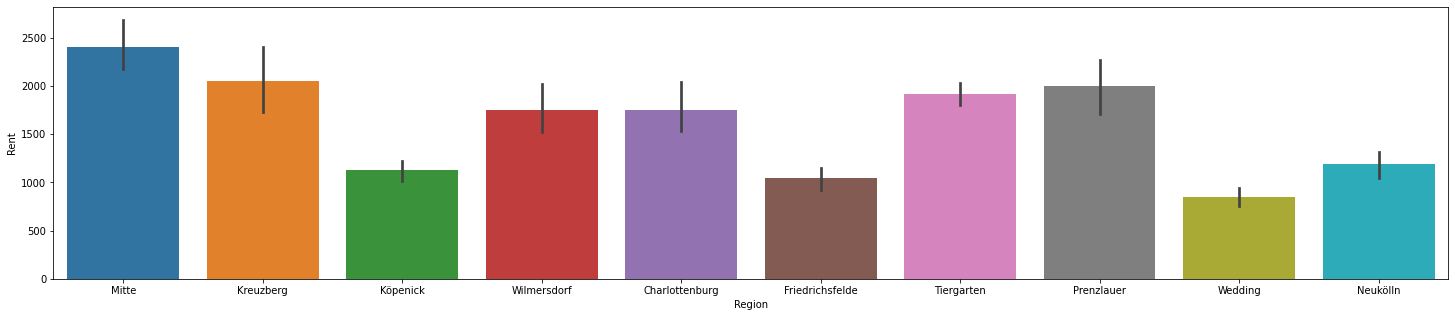

In [ ]:
 # to analyze the hypothesis
plt.figure(figsize=(25, 5))

sns.barplot(
    x='Region',
    y='Rent',
    data=df
)

In [ ]:
#a = df.groupby('Region')['Rent'].std()

## Conclusion

The rent is dependent on the location of the apartment. 

# Hypothesis for Condition and rent

Does Conditon of the apartment predict the rent?

 

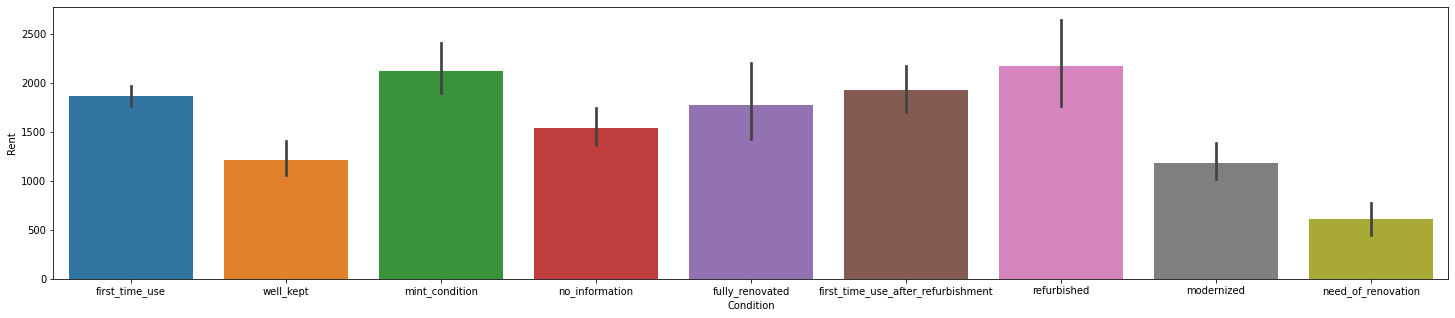

In [ ]:
plt.figure(figsize=(25, 5))

sns.barplot(
    x='Condition',
    y='Rent',
    data=df)

Conclusion 

The rent is dependent on the condition of the apartment.

# Hypothesis for Year_Construction and rent

Does the year of construction have an effect on the price of the apartment?



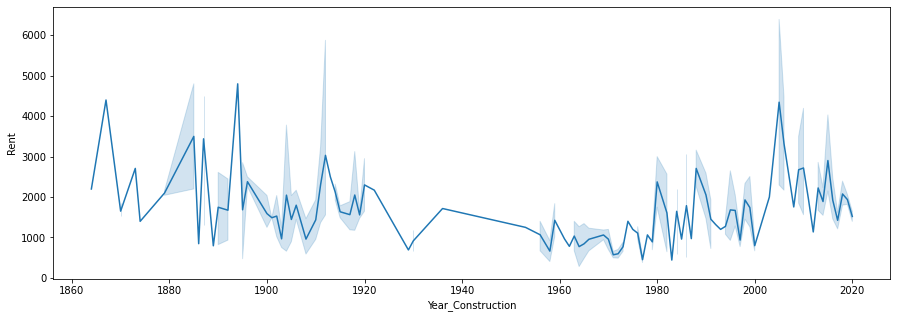

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='Year_Construction', y='Rent', data=df)

# Conclusion

The year of construction has no effect on the price of the apartment.

# Hypothesis for Space and rent

Is the Rent dependent on the space of the apartment?

**NULL HYPOTHESIS**: The space has no effect on the price of the apartment

**ALTERNATIVE HYPOTHESIS**: The space has an effect on the price of the apartment

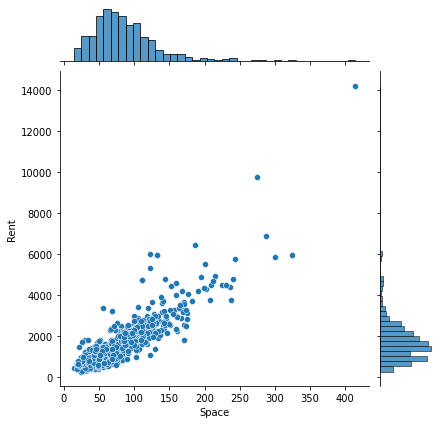

In [ ]:
sns.jointplot(
    x='Space',
    y='Rent',
    data=df
)

In [ ]:
#run a pearson correlation to get correlation coefficient and p value
from scipy.stats import pearsonr
pearsonr(df['Space'], df['Rent'])


(0.8556828356884562, 3.375838077311623e-220)

# Conclusion

At a correlation value of 0.855, there is a strong positive correlation between Space and Rent. At a pvalue of 3.38 e-220, there is a Statistical significance  of the  Space of the apartment on the rent. We can reject the null hypothesis as there is a p valuve is less than 0.05

# Hypothesis for Rooms and rent

Is the Rent dependent on the number of rooms in the apartment?

**NULL HYPOTHESIS**: The rent has no effect on the number of room in the apartment

**ALTERNATIVE HYPOTHESIS**: The rent is dependent on the number of room in the apartment

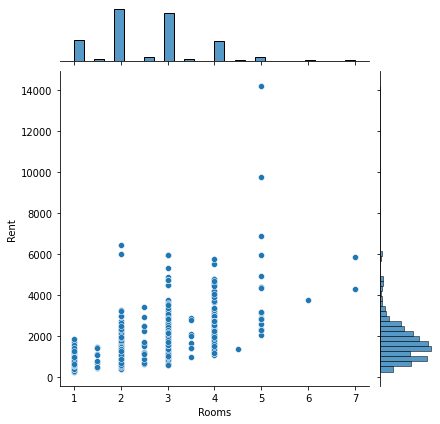

In [ ]:
sns.jointplot(
    x='Rooms',
    y='Rent',
    data=df
)

In [ ]:
from scipy.stats import pearsonr
pearsonr(df['Rooms'], df['Rent'])

(0.628816124406265, 2.501118389615816e-85)

# Conclusion

At a correlation value of 0.628, there is a fairly positive correlation between Rooms and Rent. At a pvalue of 2.50e-85, the number of rooms has an effect on the number of rooms. We can reject the null hypothesis as there is a p valuve is less than 0.05

# BONUS 

Try to create your own variables to extract one effect and seek to explain it

In [ ]:
#Lets create a new column for for average room space 

df['Avg_room_space'] = df['Space'] / df['Rooms']

In [ ]:
df.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space,Avg_room_space
0,Mitte,first_time_use,4.0,2659.00,2019-01-01,117.20,29.300
1,Kreuzberg,first_time_use,1.0,1200.00,2020-01-01,29.33,29.330
2,Köpenick,well_kept,2.0,979.00,1997-01-01,83.61,41.805
3,Wilmersdorf,well_kept,4.0,1830.22,1900-01-01,171.18,42.795
4,Kreuzberg,first_time_use,2.0,2272.00,2020-01-01,88.27,44.135


# Hypothesis for Average space room and rent

Is the Rent dependent on the Average room space?

**NULL HYPOTHESIS**: The average room space has no effect on the price of the  apartment

**ALTERNATIVE HYPOTHESIS**: The rent is dependent on the average room space of the apartment

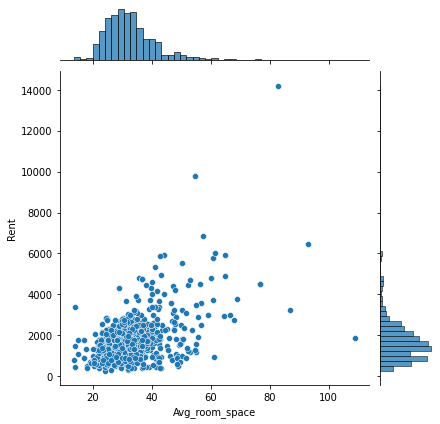

In [ ]:
sns.jointplot(
    x='Avg_room_space',
    y='Rent',
    data=df
)

In [ ]:
from scipy.stats import pearsonr
pearsonr(df['Avg_room_space'], df['Rent'])

(0.49966685029625574, 1.7070576388656768e-49)

# Conclusion

At a correlation value of 0.499, there is a fairly positive correlation between average room space  and Rent. At a pvalue of 1.7 e-49, the average room space  has an effect on the rent.